<AxesSubplot:xlabel='Months'>

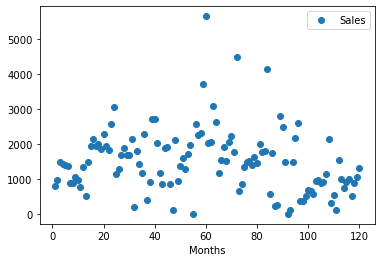

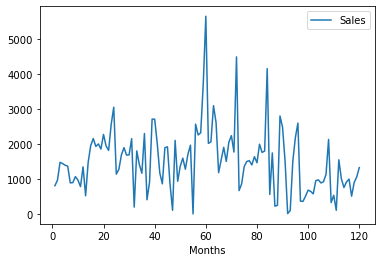

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

#Readind data from xlsx
df=pd.read_excel('ToyotaSales.xlsx')
#data manipulation
df.drop([0], inplace = True)
#plotting data
df = df.rename(columns={df.columns[1]: 'Sales'})
df = df.rename(columns={df.columns[0]: 'Months'})

df.plot(x='Months', y='Sales', style='o')
df.plot(x='Months', y='Sales', style='-')



<AxesSubplot:xlabel='Months'>

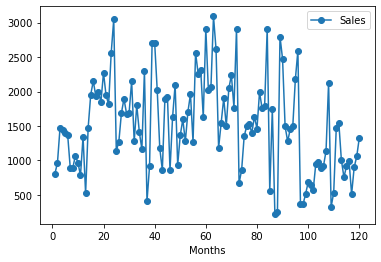

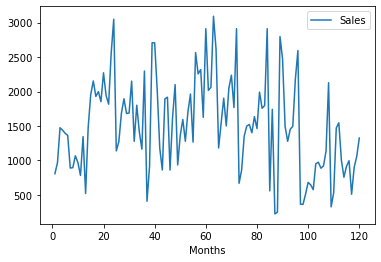

In [2]:
#df['Monthly Sales of Toyota Vehicles in Turkey (Jan. 2006 to December 2015) (Source: ODD)'][55] = 10
#df = df.set_index('Monthly Sales of Toyota Vehicles in Turkey (Jan. 2006 to December 2015) (Source: ODD)')
#£df.at[55, 'Unnamed: 1'] = 

#I found mean of outliers in 12 month seasonality
Mean55 = df.loc[df['Months'] % 12 == 7, 'Sales'].mean()
Mean60 = df.loc[df['Months'] % 12 == 0, 'Sales'].mean()
Mean92 = df.loc[df['Months'] % 12 == 8, 'Sales'].mean()
Mean84 = df.loc[df['Months'] % 12 == 0, 'Sales'].mean()
Mean72 = df.loc[df['Months'] % 12 == 0, 'Sales'].mean()
Mean59 = df.loc[df['Months'] % 12 == 11, 'Sales'].mean()
Mean93 = df.loc[df['Months'] % 12 == 9, 'Sales'].mean()
Mean111 = df.loc[df['Months'] % 12 == 3, 'Sales'].mean()
Mean47 = df.loc[df['Months'] % 12 == 11, 'Sales'].mean()
Mean32 = df.loc[df['Months'] % 12 == 8, 'Sales'].mean()
#Enter means for outlier entries
df.at[55, 'Sales'] = Mean55
df.at[60, 'Sales'] = Mean60
df.at[92, 'Sales'] = Mean92
df.at[84, 'Sales'] = Mean84
df.at[72, 'Sales'] = Mean72
df.at[59, 'Sales'] = Mean59
df.at[93, 'Sales'] = Mean93
df.at[111, 'Sales'] = Mean111
df.at[47, 'Sales'] = Mean47
df.at[32, 'Sales'] = Mean32

df.plot(x='Months', y='Sales', style='-o')
df.plot(x='Months', y='Sales', style='-')



In [3]:
# Shifting values in sales column to generate forecasts 
#Generate empty rows to insert Forecast because of Length.
Dt_1 = np.pad(df['Sales'],(1,0),mode='constant')
Dt_12 = np.pad(df['Sales'],(12,0),mode='constant')

df = df.reindex(list(range(1, 122))).reset_index(drop=True)
df['Dt−1'] = pd.Series(Dt_1)
df = df.reindex(list(range(0, 132))).reset_index(drop=True)
df['Dt−12'] = pd.Series(Dt_12)

#Generate new Months
array = [x for x in range(121, 133)]
m = df['Months'].isna()
df.loc[m, 'Months'] = array
df = df.set_index('Months')

#Make Nan for some forecast entries
df.loc[df['Dt−1'] == 0,'Dt−1'] = np.nan
df.loc[df['Dt−12'] == 0,'Dt−12'] = np.nan
#calculation error
df['Error Dt−1'] = df['Sales'] - df['Dt−1']
df['Error Dt−12'] = df['Sales'] - df['Dt−12']


In [4]:
#2007-2015 
df['Error Dt−1'] = df['Error Dt−1'][12:132]

#Calculation of Mean absolute errors for Dt-1 and Dt-12
MAE_Dt1 =abs(df['Error Dt−1']).mean()
MAE_Dt12 = abs(df['Error Dt−12']).mean()
print("Mean absolute errors for Dt1: ",MAE_Dt1,"for Dt12:", MAE_Dt12)

#Calculation of Mean absolute Percentage error
MAPE_Dt1 = np.mean(np.abs(df['Error Dt−1'] / df['Sales']))*100
MAPE_Dt12 = np.mean(np.abs(df['Error Dt−12'] / df['Sales']))*100
print("Mean absolute Percentage error for Dt1: ", MAPE_Dt1,"for Dt12:",MAPE_Dt12)

#Calculation of RMSE
RMSE_Dt1 = np.sqrt((df['Error Dt−1'] ** 2).mean())
RMSE_Dt12 = np.sqrt((df['Error Dt−12'] ** 2).mean())
print("RMSE for Dt1: ", RMSE_Dt1,"for Dt12: " ,RMSE_Dt12)



Mean absolute errors for Dt1:  566.3740740740742 for Dt12: 625.9453703703704
Mean absolute Percentage error for Dt1:  58.39300617437584 for Dt12: 58.07570015858959
RMSE for Dt1:  802.4325007957574 for Dt12:  794.1492433089314


In [5]:
#Calculation Moving averages for 3 and shifting 1 for data manipulation
df['MA-3'] = df['Sales'].rolling(window=3).mean()
df['MA-3'] = df['MA-3'].shift(1)

#Calculation errors
df['Error MA-3'] = df['Sales'] - df['MA-3']

#2007-2015 
df['Error MA-3'] = df['Error MA-3'][12:132]

#Calculation Mean absolute errors
MAE_MA3 =abs(df['Error MA-3']).mean()
print("Mean absolute errors: ", MAE_MA3)

#Calculation of Mean absolute Percentage error
MAPE_MA3 = np.mean(np.abs(df['Error MA-3'] / df['Sales']))*100
print("Mean absolute Percentage error", MAPE_MA3)

#Calculation of RMSE
RMSE_MA3 = np.sqrt((df['Error MA-3'] ** 2).mean())
print("RMSE: ", RMSE_MA3)


Mean absolute errors:  540.7506172839506
Mean absolute Percentage error 57.08381399829198
RMSE:  712.8681040166407


In [31]:
#### PREDİCTİON İNTERVAL %90 FOR MA-3 ####

Xtrain = df['Sales'][12:108]
Xtest = df['Sales'][108:120]
ytrain = df['MA-3'][12:108]
ytest = df['MA-3'][108:120]

from sklearn.ensemble import GradientBoostingRegressor

m1 = GradientBoostingRegressor(loss="quantile",alpha=0.1)
m2 = GradientBoostingRegressor(loss="quantile",alpha=0.9)

m1.fit(np.reshape(np.array(Xtrain),(-1,1)),np.reshape(np.array(ytrain),(-1,1)))
m2.fit(np.reshape(np.array(Xtrain),(-1,1)),np.reshape(np.array(ytrain),(-1,1)))
pred=pd.DataFrame(ytest)      #Actual value
pred["lower quartile"]=m1.predict(np.reshape(np.array(Xtest),(-1,1)))
pred["upper quartile"]=m2.predict(np.reshape(np.array(Xtest),(-1,1)))

pred

C:\Users\Kadir\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Kadir\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,MA-3,lower quartile,upper quartile
Months,,,
109,1394.666667,841.995944,2102.396630
110,1197.000000,839.761427,2102.396630
111,996.666667,884.816606,2170.211131
112,777.633333,1377.142233,2294.071232
113,1184.300000,725.519813,2120.045025
114,1341.300000,413.833527,2120.045025
115,1103.333333,756.453133,2120.045025
116,893.000000,725.519813,2120.045025
117,890.000000,1107.565740,2102.396630


,Sales,SES,Error for SES
Periods,,,
0,522,NaN,NaN
1,1478,522.000000,956.0
2,1955,808.800000,1146.2
3,2153,1152.660000,1000.34
4,1929,1452.762000,476.238
...,...,...,...
104,510,994.265004,-484.265004
105,900,848.985502,51.014498
106,1058,864.289852,193.710148


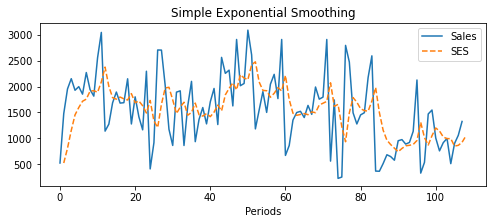

In [37]:

d = df['Sales'][12:120]
#Simple Exponential Smoothing 
alpha=0.3
extra_periods=1
d = np.array(d)  # Transform the input into a numpy array  
cols = len(d)  # Historical period length  
d = np.append(d,[np.nan]*extra_periods)  # Append np.nan into the demand array to cover future periods  
f = np.full(cols+extra_periods,np.nan)  # Forecast array  
f[1] = d[0]  # initialization of first forecast     
# Create all the t+1 forecasts until end of historical period  
for t in range(2,cols+1):  
    f[t] = alpha*d[t-1]+(1-alpha)*f[t-1]  
f[cols+1:] = f[t]  # Forecast for all extra periods  
cf = pd.DataFrame.from_dict({"Sales":d,"SES":f,"Error for SES":d-f})  

cf.index.name = "Periods"



cf[["Sales","SES"]].plot(figsize=(8,3),title="Simple Exponential Smoothing",style=["-","--"])  
cf
#Best alpha = 0.3 or 0.2 because their error values are too close

In [7]:
#Calculation Mean absolute errors
MAE_SES =abs(cf['Error for SES']).mean()
print("Mean absolute errors: ", MAE_SES)

#Calculation of Mean absolute Percentage error
MAPE_SES = np.mean(np.abs(cf['Error for SES'] / cf['Sales']))*100
print("Mean absolute Percentage error: ", MAPE_SES)

#Calculation of RMSE
RMSE_SES = np.sqrt((cf['Error for SES'] ** 2).mean())
print("RMSE: ", RMSE_SES)

Mean absolute errors:  519.7485057045969
Mean absolute Percentage error:  55.21481621601676
RMSE:  680.5195044070142


In [40]:
#### PREDİCTİON İNTERVAL %90 FOR Simple Exponential Smoothing ####

Xtrain = cf['Sales'][11:95]
Xtest = cf['Sales'][95:107]
ytrain = cf['SES'][12:96]
ytest = cf['SES'][96:108]


m1 = GradientBoostingRegressor(loss="quantile",alpha=0.1)
m2 = GradientBoostingRegressor(loss="quantile",alpha=0.9)

m1.fit(np.reshape(np.array(Xtrain),(-1,1)),np.reshape(np.array(ytrain),(-1,1)))
m2.fit(np.reshape(np.array(Xtrain),(-1,1)),np.reshape(np.array(ytrain),(-1,1)))
pred=pd.DataFrame(ytest)      #Actual value
pred["lower quartile"]=m1.predict(np.reshape(np.array(Xtest),(-1,1)))
pred["upper quartile"]=m2.predict(np.reshape(np.array(Xtest),(-1,1)))

pred

C:\Users\Kadir\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Kadir\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,SES,lower quartile,upper quartile
Periods,,,
96,1308.845237,1701.956063,2067.943557
97,1014.291666,932.021595,1620.251355
98,870.504166,960.187044,1620.251355
99,1050.622916,1460.624078,1821.999236
100,1199.536041,1479.154404,1926.769517
101,1141.475229,852.938724,1747.738910
102,1026.132660,864.777184,1747.738910
103,993.092862,871.974289,1747.738910
104,994.265004,852.938724,1747.738910


In [41]:
#Reading again from original data
dataset = pd.read_excel('ToyotaSales.xlsx')
del dataset['Monthly Sales of Toyota Vehicles in Turkey (Jan. 2006 to December 2015) (Source: ODD)']
dataset.drop([0], inplace = True)
dataset = dataset[12:120]


,Sales,SES,Error for SES,DES,Error for DES
Periods,,,,,
0,522,NaN,NaN,NaN,NaN
1,1478,522.000000,956.0,522.000000,956.0
2,1955,808.800000,1146.2,1478.000000,477.0
3,2153,1152.660000,1000.34,2242.400000,-89.4
4,1929,1452.762000,476.238,2757.248000,-828.248
...,...,...,...,...,...
104,510,994.265004,-484.265004,932.693450,-422.69345
105,900,848.985502,51.014498,768.511387,131.488613
106,1058,864.289852,193.710148,805.321238,252.678762


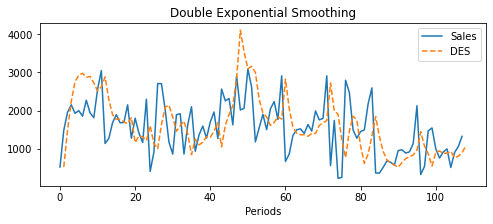

In [42]:
#Double Exponential Smoothing
alpha=0.4
gamma = 0.2
db = dataset.iloc[:, :].values.astype('float32')
forecast = np.zeros(len(db) + 1)
pt = db[0][0]
bt = db[1][0] - db[0][0]
forecast[0] = pt
for i in range(1, len(db)):
    temp_pt = alpha * db[i][0] + (1 - alpha) * (pt + bt)
    bt = gamma * (temp_pt - pt) + (1 - gamma) * bt
    pt = temp_pt
    forecast[i] = pt
forecast[-1] = pt + (1 * bt)

#Calculation error for DES
cf['DES'] = forecast
cf['DES'] = cf['DES'].shift(1)
cf['Error for DES'] = cf['Sales'] - cf['DES']

cf[["Sales","DES"]].plot(figsize=(8,3),title="Double Exponential Smoothing",style=["-","--"])  
cf

###0.4 alpha and 0.2 gamma is the best solution for DES.

In [10]:
#Calculation Mean absolute errors
MAE_DES =abs(cf['Error for DES']).mean()
print("Mean absolute errors: ", MAE_DES)

#Calculation of Mean absolute Percentage error
MAPE_DES = np.mean(np.abs(cf['Error for DES'] / cf['Sales']))*100
print("Mean absolute Percentage error: ", MAPE_DES)

#Calculation of RMSE
RMSE_DES = np.sqrt((cf['Error for DES'] ** 2).mean())
print("RMSE: ", RMSE_DES)

Mean absolute errors:  625.7756912014379
Mean absolute Percentage error:  62.357593840768686
RMSE:  832.093535638364


In [44]:
#### PREDİCTİON İNTERVAL %90 FOR Double Exponential Smoothing ####

Xtrain = cf['Sales'][11:95]
Xtest = cf['Sales'][95:107]
ytrain = cf['DES'][12:96]
ytest = cf['DES'][96:108]


m1 = GradientBoostingRegressor(loss="quantile",alpha=0.1)
m2 = GradientBoostingRegressor(loss="quantile",alpha=0.9)

m1.fit(np.reshape(np.array(Xtrain),(-1,1)),np.reshape(np.array(ytrain),(-1,1)))
m2.fit(np.reshape(np.array(Xtrain),(-1,1)),np.reshape(np.array(ytrain),(-1,1)))
pred=pd.DataFrame(ytest)      
pred["lower quartile"]=m1.predict(np.reshape(np.array(Xtest),(-1,1)))
pred["upper quartile"]=m2.predict(np.reshape(np.array(Xtest),(-1,1)))

pred

C:\Users\Kadir\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Kadir\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,DES,lower quartile,upper quartile
Periods,,,
96,1447.098857,1308.943818,2132.900927
97,1071.522616,767.331173,1989.976288
98,869.815062,712.776038,1989.976288
99,550.805324,860.845587,1849.239936
100,899.895056,868.649046,1937.289577
101,944.717290,744.325268,1818.361508
102,876.913248,632.507228,1818.361508
103,890.237763,788.216313,1818.361508
104,932.693450,744.325268,1818.361508


,Sales,SES,Error for SES
0,522,NaN,NaN
1,1478,522.000000,956.0
2,1955,1478.000000,477.0
3,2153,1955.000000,198.0
4,1929,808.800000,1120.2
5,1999,1621.100000,377.9
6,1854,2014.400000,-160.4
7,2272,1144.860000,1127.14
8,1943,1734.470000,208.53
9,1816,1966.280000,-150.28


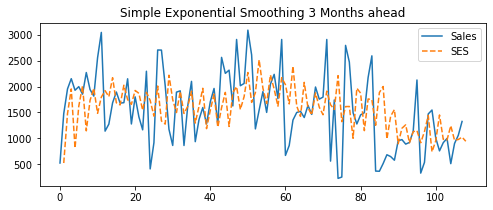

In [45]:

#3-MONTHS AHEAD

d = df['Sales'][12:120]
#Simple Exponential Smoothing with 3-Months ahead forecasting 
alpha=0.3
extra_periods=1
d = np.array(d)  # Transform the input into a numpy array  
cols = len(d)  # Historical period length  
d = np.append(d,[np.nan]*extra_periods)  # Append np.nan into the demand array to cover future periods  
f = np.full(cols+extra_periods,np.nan)  # Forecast array  
f[1] = d[0]  # initialization of first forecasts
f[2] = d[1]
f[3] = d[2]

for t in range(4,cols+1):  
    f[t] = alpha*d[t-3]+(1-alpha)*f[t-3]  
f[cols+1:] = f[t]  # Forecast for all extra periods  
cf = pd.DataFrame.from_dict({"Sales":d,"SES":f,"Error for SES":d-f})  





cf[["Sales","SES"]].plot(figsize=(8,3),title="Simple Exponential Smoothing 3 Months ahead",style=["-","--"])  
cf.head(20)
#Best alpha = 0.3 or 0.2 because their error values are too close

,Sales,SES,Error for SES
0,522,NaN,NaN
1,1478,522.000,956.0
2,1955,1478.000,477.0
3,2153,1955.000,198.0
4,1929,2153.000,-224.0
5,1999,1929.000,70.0
6,1854,1999.000,-145.0
7,2272,808.800,1463.2
8,1943,1621.100,321.9
9,1816,2014.400,-198.4


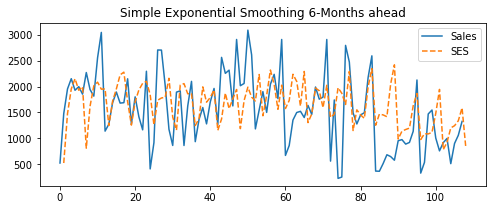

In [46]:
#6-MONTHS AHEAD

d = df['Sales'][12:120]
#Simple Exponential Smoothing with 6-Months ahead forecasting 
alpha=0.3
extra_periods=1
d = np.array(d)  # Transform the input into a numpy array  
cols = len(d)  # Historical period length  
d = np.append(d,[np.nan]*extra_periods)  # Append np.nan into the demand array to cover future periods  
f = np.full(cols+extra_periods,np.nan)  # Forecast array  
f[1] = d[0]  # initialization of first forecasts
f[2] = d[1]
f[3] = d[2]
f[4] = d[3]  # initialization of first forecasts
f[5] = d[4]
f[6] = d[5]

for t in range(7,cols+1):  
    f[t] = alpha*d[t-6]+(1-alpha)*f[t-6]  
f[cols+1:] = f[t]  # Forecast for all extra periods  
cf = pd.DataFrame.from_dict({"Sales":d,"SES":f,"Error for SES":d-f})  





cf[["Sales","SES"]].plot(figsize=(8,3),title="Simple Exponential Smoothing 6-Months ahead",style=["-","--"])  
cf.head(20)
#Best alpha = 0.3 or 0.2 because their error values are too close

C:\Users\Kadir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

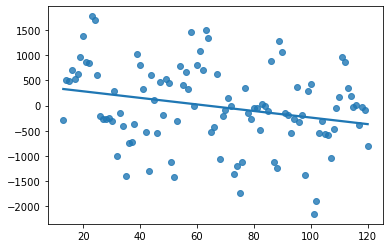

In [13]:

### Transformation to Ut ####

d = df['Sales'][0:120]
d = np.array(d)  # Transform the input into a numpy array 
extra_periods = 1
cols = len(d)  # Historical period length
d = np.append(d,[np.nan]*extra_periods)  # Append np.nan into the Sales array to cover future periods  
f = np.full(cols+extra_periods,np.nan)  # Z array  

for t in range(12,cols+1):  
    f[t] = d[t]-d[t-12]  
f[cols+1:] = f[t]  # Z for all extra periods  
zf = pd.DataFrame.from_dict({"Sales":d,"Z":f})
zf = zf.reset_index()
zf['index'] = zf['index'] + 1
zf = zf.rename({'index': 'Months'}, axis=1)

#PLOTTİNG

x = zf['Months']
x = np.array(x)
y = zf['Z']
y = np.array(y)

sns.regplot(x, y, ci=None)

#Seasonality is eliminated but there is a trend so again by taking a first difference of to remove the trend.

C:\Users\Kadir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

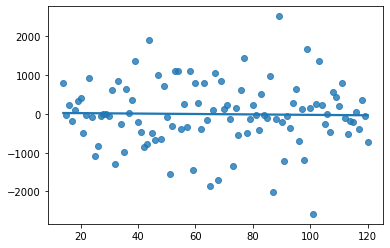

In [14]:
#### Elimination of trend for Ut ####

d = zf['Z']
d = np.array(d)  # Transform the input into a numpy array 
extra_periods = 1
cols = len(d)  # Historical period length
d = np.append(d,[np.nan]*extra_periods)  # Append np.nan into the sales array to cover future periods  
f = np.full(cols+extra_periods,np.nan)  # Z array  

for t in range(12,cols+1):  
    f[t] = d[t]-d[t-1]  
f[cols+1:] = f[t]  # z for all extra periods  
rf = pd.DataFrame.from_dict({"Sales":d,"Z":f})
rf = rf.reset_index()
rf['index'] = rf['index'] + 1
rf = rf.rename({'index': 'Months'}, axis=1)

#PLOTTİNG
x = rf['Months']
x = np.array(x)
y = rf['Z']
y = np.array(y)

sns.regplot(x, y, ci=None)
#There is no trend and seasonality and in completely level series

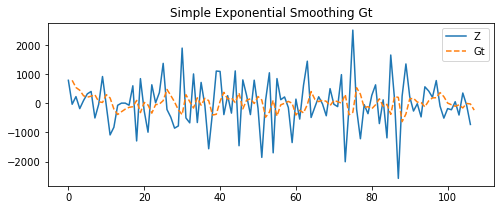

In [47]:
d = rf['Z'][13:120]
#Simple Exponential Smoothing 
alpha=0.3
extra_periods=1
d = np.array(d)  # Transform the input into a numpy array  
cols = len(d)  # Historical period length  
d = np.append(d,[np.nan]*extra_periods)  # Append np.nan into the demand array to cover future periods  
f = np.full(cols+extra_periods,np.nan)  # Forecast array  
f[1] = d[0]  # initialization of first forecast     
# Create all the t+1 forecasts until end of historical period  
for t in range(2,cols+1):  
    f[t] = alpha*d[t-1]+(1-alpha)*f[t-1]  
f[cols+1:] = f[t]  # Forecast for all extra periods  
Ef = pd.DataFrame.from_dict({"Z":d,"Gt":f})  

g = zf['Sales'][12:120]
g = np.array(g)
Ef['Dt-12'] = g

Ef[["Z","Gt"]].plot(figsize=(8,3),title="Simple Exponential Smoothing Gt",style=["-","--"])  

#Best alpha = 0.3 or 0.2 because their error values are too close

Ef['F'] = Ef['Gt'] + Ef['Dt-12']
Ef['Error'] = Ef['F'] - Ef['Dt-12']




In [18]:
#Calculation Mean absolute errors
MAE_LAST =abs(Ef['Error']).mean()
print("Mean absolute error: ", MAE_LAST)

#Calculation of Mean absolute Percentage error
MAE_LAST = np.mean(np.abs(Ef['Error'] / Ef['Dt-12']))*100
print("Mean absolute Percentage error: ", MAE_LAST)

#Calculation of RMSE
MAE_LAST = np.sqrt((Ef['Error'] ** 2).mean())
print("RMSE: ", MAE_LAST)


##### THİS İS BEST SOLUTİON AT THİS HOMEWORK ####

Mean absolute error:  197.1288193252626
Mean absolute Percentage error:  18.27298572773883
RMSE:  250.5583500674935
